In [1]:
from bs4 import BeautifulSoup
import requests
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Getting the url of the page to be scrapped
url = 'https://onefootball.com/en/competition/premier-league-9/table'
response = requests.get(url)

In [5]:
# uisng beautiful soup to parse the html content of the page
soup = BeautifulSoup(response.content, 'html.parser')

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <link href="/next-assets/favicon.png" rel="icon"/>
  <link href="/next-assets/manifest.json" rel="manifest"/>
  <title>
   Premier League table | OneFootball
  </title>
  <meta content="See the current Premier League table and standings on OneFootball." name="twitter:description"/>
  <meta content="https://photobooth-api.onefootball.com/api/screenshot/%2Fv2%2Fphotobooth%2Fen%2Fcompetition%2F9" name="twitter:image"/>
  <meta content="summary_large_image" name="twitter:card"/>
  <meta content="https://onefootball.com/en/competition/premier-league-9/table" name="twitter:url"/>
  <meta content="Check out the Premier League standings via OneFootball" name="twitter:title"/>
  <meta content="onefootball://competition/9?seasonId=40791&amp;view=table" name="twitter:app:url:googleplay"/>
  <meta content="onefootball://competition/9?seasonId=40791&amp;view=table" name="twitt

In [7]:
# Standing_standings__row__5sdZG Standing_standings__rowLink__Skr86
index = []
data = {}

# Getting the tag that contains all the data to be scrapped
all=soup.find("ul", {'class':''})

# a for loop that gets all the elements containing the needed data 
for a in all:
    indices = a.find_all('abbr', {'class':'title-7-medium'})
    name = a.find_all("p", {"class":"Standing_standings__teamName__psv61"})
    numbers = a.find_all("div", {"class":"Standing_standings__cell__5Kd0W"})
        
    # converting the elements in the name and number var into text and converting them into dict
    for n in name:
        data[n.text] = [number.text for number in numbers][2:]
        
    # appending the headers in the indices variable to the created list called index after converting to text
    for x in indices:
        index.append(x.text)
print(index, data)


['PL', 'W', 'D', 'L', 'GD', 'PTS'] {'Manchester City': ['11', '9', '0', '2', '20', '27'], 'Tottenham Hotspur': ['11', '8', '2', '1', '10', '26'], 'Liverpool': ['11', '7', '3', '1', '14', '24'], 'Arsenal': ['11', '7', '3', '1', '14', '24'], 'Aston Villa': ['11', '7', '1', '3', '10', '22'], 'Newcastle United': ['11', '6', '2', '3', '16', '20'], 'Brighton & Hove Albion': ['11', '5', '3', '3', '4', '18'], 'Manchester United': ['11', '6', '0', '5', '-4', '18'], 'Brentford': ['11', '4', '4', '3', '5', '16'], 'Chelsea': ['11', '4', '3', '4', '5', '15'], 'Crystal Palace': ['11', '4', '3', '4', '-3', '15'], 'West Ham United': ['11', '4', '2', '5', '-2', '14'], 'Nottingham Forest': ['11', '3', '4', '4', '-3', '13'], 'Wolverhampton Wanderers': ['11', '3', '3', '5', '-5', '12'], 'Fulham': ['11', '3', '3', '5', '-8', '12'], 'Everton': ['11', '3', '2', '6', '-4', '11'], 'Luton Town': ['11', '1', '3', '7', '-11', '6'], 'AFC Bournemouth': ['11', '1', '3', '7', '-18', '6'], 'Burnley': ['11', '1', '1', 

In [8]:
# converting the dictionary into a dataframe, making the index as the index of the data 
df = pd.DataFrame(data, index=index)

In [9]:
df

,Manchester City,Tottenham Hotspur,Liverpool,Arsenal,Aston Villa,Newcastle United,Brighton & Hove Albion,Manchester United,Brentford,Chelsea,Crystal Palace,West Ham United,Nottingham Forest,Wolverhampton Wanderers,Fulham,Everton,Luton Town,AFC Bournemouth,Burnley,Sheffield United
PL,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
W,9,8,7,7,7,6,5,6,4,4,4,4,3,3,3,3,1,1,1,1
D,0,2,3,3,1,2,3,0,4,3,3,2,4,3,3,2,3,3,1,1
L,2,1,1,1,3,3,3,5,3,4,4,5,4,5,5,6,7,7,9,9
GD,20,10,14,14,10,16,4,-4,5,5,-3,-2,-3,-5,-8,-4,-11,-18,-19,-21
PTS,27,26,24,24,22,20,18,18,16,15,15,14,13,12,12,11,6,6,4,4


In [10]:
# transposing the dataframe
df=df.T

In [11]:
df

,PL,W,D,L,GD,PTS
Manchester City,11,9,0,2,20,27
Tottenham Hotspur,11,8,2,1,10,26
Liverpool,11,7,3,1,14,24
Arsenal,11,7,3,1,14,24
Aston Villa,11,7,1,3,10,22
Newcastle United,11,6,2,3,16,20
Brighton & Hove Albion,11,5,3,3,4,18
Manchester United,11,6,0,5,-4,18
Brentford,11,4,4,3,5,16
Chelsea,11,4,3,4,5,15


In [12]:
#resetting the index to to the locations
df.reset_index(inplace=True)

In [29]:
df.head()

,Team,Match played,Winning,Draw,Lost,Goal difference,Point
0,Manchester City,11,9,0,2,20,27
1,Tottenham Hotspur,11,8,2,1,10,26
2,Liverpool,11,7,3,1,14,24
3,Arsenal,11,7,3,1,14,24
4,Aston Villa,11,7,1,3,10,22


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   20 non-null     object
 1   PL      20 non-null     object
 2   W       20 non-null     object
 3   D       20 non-null     object
 4   L       20 non-null     object
 5   GD      20 non-null     object
 6   PTS     20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


In [15]:
# converting the cols into interger
df[['PTS', 'GD', 'L', 'D', 'W', 'PL']] = df[['PTS', 'GD', 'L', 'D', 'W', 'PL']].astype('int64')

In [16]:
# renaming the cols to a more meaninful name
df.rename(columns={'index':'Team'}, inplace=True)
df.rename(columns={'W':'Winning'}, inplace=True)
df.rename(columns={'PL':'Match played'}, inplace=True)
df.rename(columns={'D':'Draw'}, inplace=True)
df.rename(columns={'L':'Lost'}, inplace=True)
df.rename(columns={'GD':'Goal difference'}, inplace=True)
df.rename(columns={'PTS':'Point'}, inplace=True)

In [30]:
df.head()

,Team,Match played,Winning,Draw,Lost,Goal difference,Point
0,Manchester City,11,9,0,2,20,27
1,Tottenham Hotspur,11,8,2,1,10,26
2,Liverpool,11,7,3,1,14,24
3,Arsenal,11,7,3,1,14,24
4,Aston Villa,11,7,1,3,10,22


In [91]:
# saving the data frame as a csv file to avoid error occuring
df.to_csv('premiere_league_data.csv')

In [92]:
# Loading the saved csv file
df = pd.read_csv('Premiere_league_data.csv')

In [18]:
# getting the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Team             20 non-null     object
 1   Match played     20 non-null     int64 
 2   Winning          20 non-null     int64 
 3   Draw             20 non-null     int64 
 4   Lost             20 non-null     int64 
 5   Goal difference  20 non-null     int64 
 6   Point            20 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.2+ KB


In [78]:
# sorting the table by the PTS col
df0 = df.sort_values('Point', ascending = False).head(6)

Text(0.5, 1.0, 'Top 6 teams with the highest points')

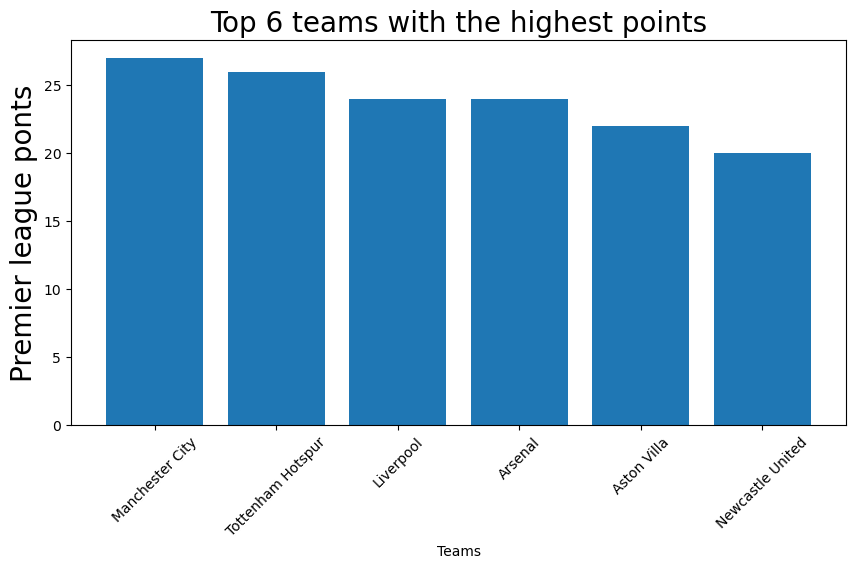

In [79]:
# plotting a bar chart to show the team with the highest and lowet point
fig = plt.figure(figsize = (10, 5))
plt.bar(df0['Team'], df0['Point'] )
plt.xticks(rotation = 45)
plt.xlabel('Teams')
plt.ylabel('Premier league ponts', fontsize = 20)
plt.title('Top 6 teams with the highest points', fontsize = 20)

In [80]:
# sorting the table values based on the winnings col
df1 = df.sort_values('Winning', ascending = False).head(6)

Text(0.5, 1.0, 'Top 6 teams that won the highest number of matches')

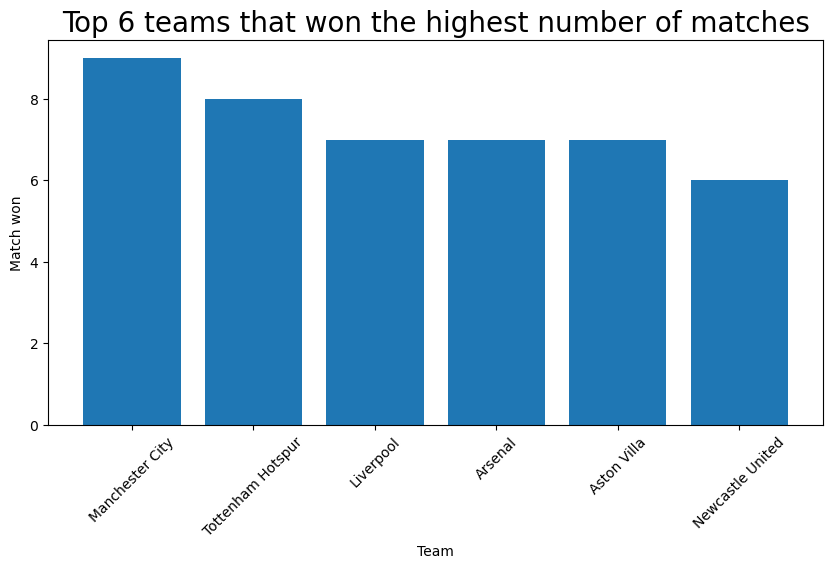

In [82]:
# plotting a chart to see the teams with the highest and lowest winnings
fig = plt.figure(figsize = (10, 5))
plt.bar(df1['Team'], df1['Winning'] )
plt.xticks(rotation = 45)
plt.xlabel('Team')
plt.ylabel('Match won')
plt.title('Top 6 teams that won the highest number of matches', fontsize = 20)

In [84]:
# sorting the values by the match loss col
df2 = df.sort_values('Lost', ascending = True).head(6)

Text(0.5, 1.0, 'Top 6 teams with the least lost matches ')

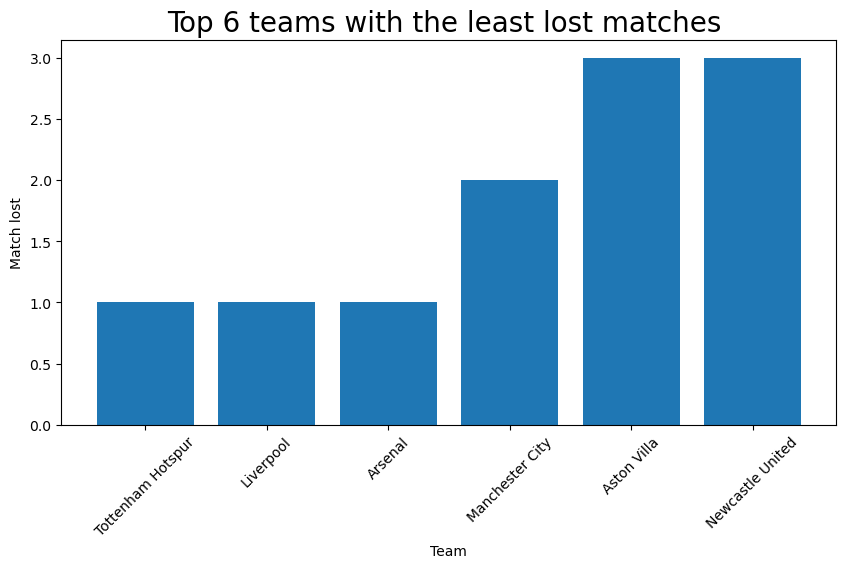

In [85]:
# plotting the matches lost by teams
fig = plt.figure(figsize = (10, 5))
plt.bar(df2['Team'], df2['Lost'] )
plt.xticks(rotation = 45)
plt.xlabel('Team')
plt.ylabel('Match lost')
plt.title('Top 6 teams with the least lost matches ', fontsize = 20)


In [65]:
# sorting values by the Goal difference col
df3 = df.sort_values('Goal difference', ascending = False).head(6)

Text(0.5, 1.0, 'Goal difference by team ')

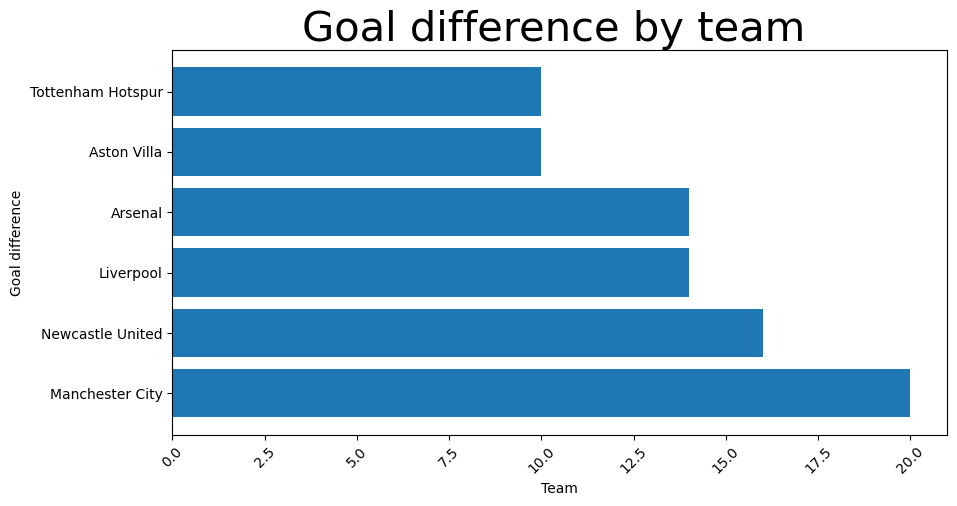

In [68]:
# plotting the Goal difference between the teams
fig = plt.figure(figsize = (10, 5))
plt.barh(df3['Team'], df3['Goal difference'] )
plt.xticks(rotation = 45)
plt.xlabel('Team')
plt.ylabel('Goal difference')
plt.title('Goal difference by team ', fontsize = 30)

In [86]:
# sorting the table values by the draw column
df4 = df.sort_values('Draw', ascending = True).head(6)

Text(0.5, 1.0, 'Teams with the least number of draw matches ')

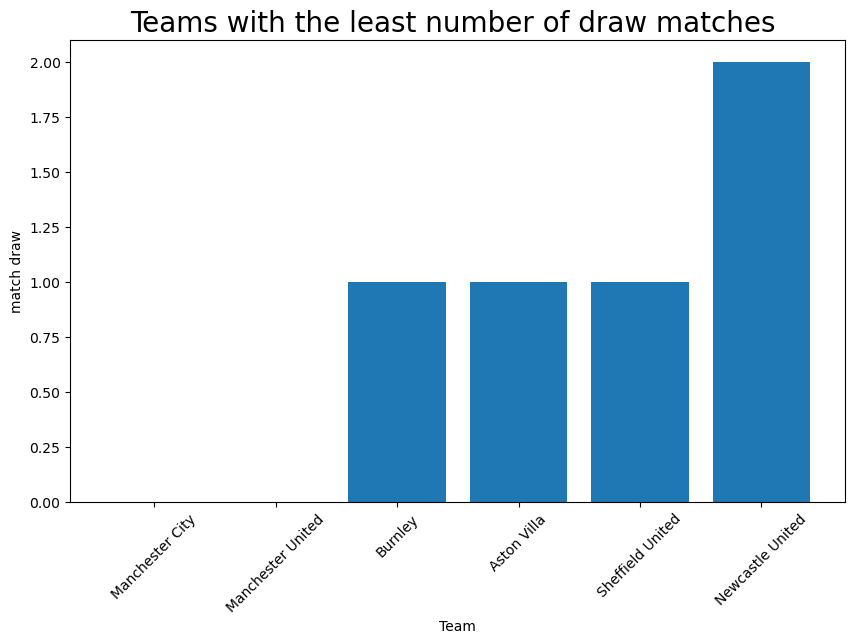

In [89]:
# plotting match draw by teams
fig = plt.figure(figsize = (10, 6))
plt.bar(df4['Team'], df4['Draw'] )
plt.xticks(rotation = 45)
plt.xlabel('Team')
plt.ylabel('match draw')
plt.title('Teams with the least number of draw matches ', fontsize = 20)